# Project 4

In this project, you will analyze the admissions data in detail and build a model and explain it. It is more open ended so feel free to use all the various techniques that you have learnt so far. 

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

### What are the predictors and dependent variable ?

The dependent variable is admission to UCLA while the predictors are GRE, GPA, and prestige of the student's undergraduate school.

### Intro: Write a problem Statement/ Specific hypothesis you have regarding admissions?

Admission to UCLA's graduate school is related to GRE and GPA. 

### Dataset:  Find the distribution of admission, GRE, GPA and Prestige

In [12]:
df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna() 
df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [13]:
df.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


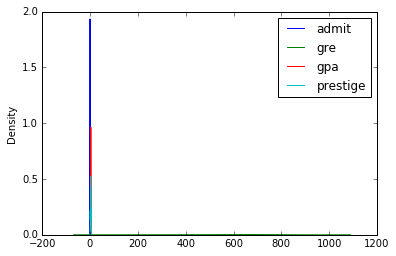

In [14]:
df.plot(kind= "density")

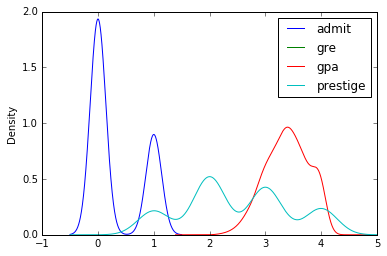

In [15]:
df.plot(kind= "density", xlim=(-1,5))

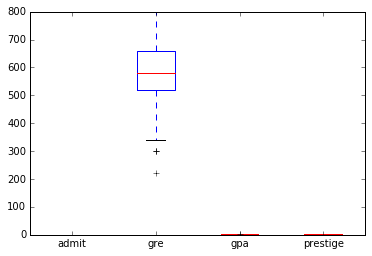

In [16]:
df.plot(kind= "box")

### FInd the correlation of each feature with admission

In [17]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


### How do you deal with the prestige feature?

Get dummies.

In [18]:
data = df.join(pd.get_dummies(df.prestige, prefix = 'prestige'))
data.head()

,admit,gre,gpa,prestige,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,3.0,0.0,0.0,1.0,0.0
1,1,660.0,3.67,3.0,0.0,0.0,1.0,0.0
2,1,800.0,4.00,1.0,1.0,0.0,0.0,0.0
3,1,640.0,3.19,4.0,0.0,0.0,0.0,1.0
4,0,520.0,2.93,4.0,0.0,0.0,0.0,1.0


### What is the best model and that model's parameter's for predicting admission? Hint: Use GridsearchCV and define what metric you use to find what is best.

GridSearchCV implements a “fit” and a “score” method. It also implements “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

class sklearn.model_selection.GridSearchCV(estimator, param_grid, scoring=None, fit_params=None, n_jobs=1, iid=True, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score='raise', return_train_score=True)[source]¶

In [72]:
# First scale the data
from sklearn import preprocessing as pp
from sklearn import linear_model as lm
features=[u'gre', u'gpa', u'prestige_1.0', u'prestige_2.0', u'prestige_3.0']
scaler = pp.StandardScaler().fit(data[features])
scaled_data = scaler.fit_transform(data[features])

In [75]:
from sklearn import grid_search
parameters = {'Cs':[i for i in range(1,10)], 'class_weight':['balanced',None], 'fit_intercept':[True,False]}
clf_lm = grid_search.GridSearchCV(lm.LogisticRegressionCV(), parameters, scoring='accuracy')
clf_lm.fit(scaled_data, data.admit)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'Cs': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'fit_intercept': [True, False], 'class_weight': ['balanced', None]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [76]:
clf_lm.best_estimator_

LogisticRegressionCV(Cs=6, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [77]:
clf_lm.best_score_

0.7103274559193955

In [78]:
features=[u'gre', u'gpa', u'prestige']
scaler = pp.StandardScaler().fit(data[features])
scaled_data = scaler.fit_transform(data[features])

In [79]:
parameters = {'Cs':[i for i in range(1,10)], 'class_weight':['balanced',None], 'fit_intercept':[True,False]}
clf_lm = grid_search.GridSearchCV(lm.LogisticRegressionCV(), parameters, scoring='accuracy')
clf_lm.fit(scaled_data, data.admit)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'Cs': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'fit_intercept': [True, False], 'class_weight': ['balanced', None]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [80]:
clf_lm.best_score_

0.69521410579345089

########

### What is the most important feature that contributes to the students probability of admission? 

In [57]:
#Institutions with a rank of 1 have the highest prestige, while those with a rank of 4 have the lowest.

print data[data.admit==1]['prestige_1.0'].value_counts()/len(data[data.admit==1])
print data[data.admit==0]['prestige_1.0'].value_counts()/len(data[data.admit==0])

0.0    0.738095
1.0    0.261905
Name: prestige_1.0, dtype: float64
0.0    0.896679
1.0    0.103321
Name: prestige_1.0, dtype: float64


In [82]:
print data[data.admit==1]['prestige_2.0'].value_counts()/len(data[data.admit==1])

0.0    0.579365
1.0    0.420635
Name: prestige_2.0, dtype: float64


In [83]:
print data[data.admit==1]['prestige_3.0'].value_counts()/len(data[data.admit==1])

0.0    0.777778
1.0    0.222222
Name: prestige_3.0, dtype: float64


In [84]:
print data[data.admit==1]['prestige_4.0'].value_counts()/len(data[data.admit==1])

0.0    0.904762
1.0    0.095238
Name: prestige_4.0, dtype: float64


In [87]:
print data[data.admit==1]['gpa' > 2].value_counts()/len(data[data.admit==1])

KeyError: True

### Visualize the model relative to prestige and GPA. HINT: Use the technique from the visualization of the flight delay model

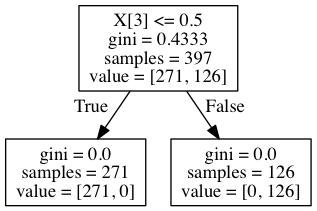

In [52]:
from sklearn import tree
from IPython.display import Image  
import pydotplus 
clf = tree.DecisionTreeClassifier()
X = df[['gre', 'gpa', 'prestige', 'admit']]
Y = X['admit']   
clf = clf.fit(X, Y)

dot_data = tree.export_graphviz(clf)
graph = pydotplus.graphviz.graph_from_dot_file("tree.dot")
Image(graph.create_png())

In [19]:
from sklearn import datasets, neighbors, metrics, grid_search, cross_validation
import matplotlib.pyplot as plt

# some n_list! keep in mind cross validation
# recall: what's an effective way to create a numerical list in python?
k = range(2, 100)
params = {'n_neighbors': k }
kf = cross_validation.KFold(len(df), n_folds = 5)
gs = grid_search.GridSearchCV(
    estimator=neighbors.KNeighborsClassifier(),
    param_grid=params,
    cv=kf,
)
gs.fit(df, df.admit)
gs.grid_scores_

[mean: 0.87406, std: 0.06513, params: {'n_neighbors': 2},
 mean: 0.89673, std: 0.04413, params: {'n_neighbors': 3},
 mean: 0.86398, std: 0.04059, params: {'n_neighbors': 4},
 mean: 0.88161, std: 0.03366, params: {'n_neighbors': 5},
 mean: 0.82620, std: 0.06960, params: {'n_neighbors': 6},
 mean: 0.82872, std: 0.06344, params: {'n_neighbors': 7},
 mean: 0.80353, std: 0.05619, params: {'n_neighbors': 8},
 mean: 0.81108, std: 0.05918, params: {'n_neighbors': 9},
 mean: 0.80856, std: 0.05372, params: {'n_neighbors': 10},
 mean: 0.80101, std: 0.08713, params: {'n_neighbors': 11},
 mean: 0.77582, std: 0.06739, params: {'n_neighbors': 12},
 mean: 0.77078, std: 0.07993, params: {'n_neighbors': 13},
 mean: 0.73552, std: 0.06675, params: {'n_neighbors': 14},
 mean: 0.74559, std: 0.05380, params: {'n_neighbors': 15},
 mean: 0.75819, std: 0.02920, params: {'n_neighbors': 16},
 mean: 0.77078, std: 0.03436, params: {'n_neighbors': 17},
 mean: 0.72796, std: 0.02340, params: {'n_neighbors': 18},
 mean

In [20]:
gs.best_params_

{'n_neighbors': 3}

In [68]:
params = {}

from sklearn import linear_model, metrics, grid_search
gs = grid_search.GridSearchCV(
    estimator=linear_model.LinearRegression(),
    param_grid=params,
    scoring='mean_squared_error')

gs.fit(data, data.admit)


print 'BEST ESTIMATOR'
# mean squared error here comes in negative, so let's make it positive.
print -gs.best_score_
# explains which grid_search setup worked best
print gs.best_estimator_
print 'ALL ESTIMATORS'
# shows all the grid pairings and their performances.
print gs.grid_scores_

BEST ESTIMATOR
5.45862799998e-27
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
ALL ESTIMATORS
[mean: -0.00000, std: 0.00000, params: {}]
